In [1]:
import os
import pandas as pd
import numpy as np
import random
import math
from decimal import Decimal

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn import linear_model
from sklearn import svm
from sklearn import tree
from sklearn.neighbors import KNeighborsRegressor

from sklearn.preprocessing import Normalizer

import matplotlib.pyplot as plt

In [2]:
# Visualize  

def accurayPlot(x, y): 
    fig, ax = plt.subplots()
    ax.scatter(x, y, edgecolors=(0,0,0))
    ax.plot([x.min(), x.max()], [x.min(), x.max()], 'k--')
    ax.set_xlabel('Actual value')
    ax.set_ylabel('Predicted')
    plt.show()

In [3]:
path = 'D:/Bioinformatics/Diplom/'
file = 'RawData_200.csv'
dfRawData200 = pd.read_csv(path+'ML/ '+file)

file = 'RawData_45.csv'
dfRawData45 = pd.read_csv(path+'ML/ '+file)

dfAllRD = dfRawData200
dfAllRD = dfAllRD.append(dfRawData45, ignore_index=True)
dfAllRD.head()

,Unnamed: 0,name,Length,X1,X2,E,S,L
0,0,1atx_,46,839,21.2,-1.500708,-58.865890,57.365182
1,1,1agg_,48,851,22.2,-1.797210,-60.767012,58.969802
2,2,1akhA,49,925,22.4,-5.642586,-53.350390,47.707804
3,3,1afp_,51,961,22.8,-5.542472,-72.049554,66.507082
4,4,1apq_,53,946,25.3,-3.719619,-62.522390,58.802771


In [4]:
# Normalize and transform the values for the two parameters (X1 - seq, and X2 - pattern)

t1 = Normalizer().fit([dfAllRD.X1])
x1 = t1.transform([dfAllRD.X1])

t2 = Normalizer().fit([dfAllRD.X2])
x2 = t1.transform([dfAllRD.X2])

In [5]:
# Create a DF for the parameters
dfData = pd.DataFrame()
dfData["x1"] = x1[0]
dfData["x2"] = x2[0]

# Actual values (Y)
E = dfAllRD.E
L = dfAllRD.L

In [6]:
# Lasso
model = linear_model.Lasso(alpha=0.1)

0.2135609071351472
[ 0.14193052 -1.1265752   0.0621634 ]


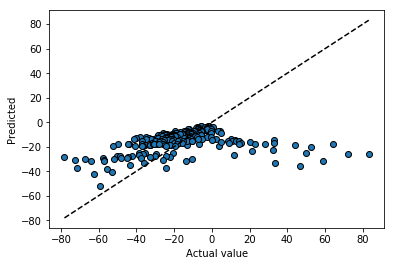

{'fit_time': array([0.        , 0.        , 0.01021695]), 'score_time': array([0., 0., 0.]), 'test_score': array([ 0.14193052, -1.1265752 ,  0.0621634 ]), 'train_score': array([0.20654881, 0.21443044, 0.34779751])}


In [7]:
# E
model.fit(dfData, E.tolist())
print(model.score(dfData, E.tolist()))

predicted = cross_val_predict(model, dfData, E.tolist(), cv=3)
print(cross_val_score(model,  dfData, E.tolist(), cv=3))

accurayPlot(E, predicted)

cvResults = cross_validate(model, dfData, E.tolist(), cv=3)
print(cvResults)

In [8]:
cvResults['fit_time']

array([0.        , 0.        , 0.01021695])

0.23355533149181706
[-2.05942673 -0.31045073 -0.20901466]


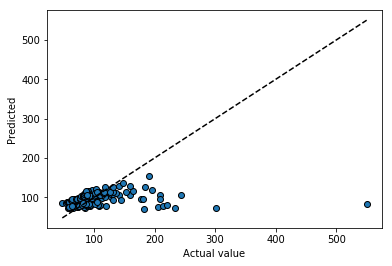

{'fit_time': array([0.        , 0.00500488, 0.        ]), 'score_time': array([0., 0., 0.]), 'test_score': array([-2.05942673, -0.31045073, -0.20901466]), 'train_score': array([0.18861532, 0.32801251, 0.46835462])}


In [9]:
# L
model.fit(dfData, L.tolist())
print(model.score(dfData, L.tolist()))

predicted = cross_val_predict(model, dfData, L.tolist(), cv=3)
print(cross_val_score(model,  dfData, L.tolist(), cv=3))

accurayPlot(L, predicted)

cvResults = cross_validate(model, dfData, L.tolist(), cv=3)
print(cvResults)

In [10]:
# 1.4.2. Regression (Support Vector Machines)
model = svm.LinearSVR()

[-1.47840261 -1.92188325 -0.00696847]


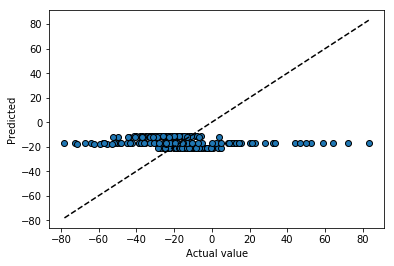

{'fit_time': array([0., 0., 0.]), 'score_time': array([0.        , 0.        , 0.00997519]), 'test_score': array([-1.45271021, -1.92188325, -0.00702032]), 'train_score': array([ 0.00163726,  0.00811358, -0.00301358])}


In [11]:
# E
#model.fit(dfData, E.tolist())
#print(model.score(dfData, E.tolist()))

predicted = cross_val_predict(model, dfData, E.tolist(), cv=3)
print(cross_val_score(model,  dfData, E.tolist(), cv=3))

accurayPlot(E, predicted)

cvResults = cross_validate(model, dfData, E.tolist(), cv=3)
print(cvResults)

-0.1435953642225123
[-0.82423144 -2.13371576 -0.64316325]


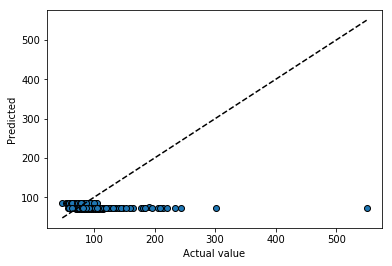

{'fit_time': array([0.00451446, 0.        , 0.        ]), 'score_time': array([0., 0., 0.]), 'test_score': array([-0.85547076, -2.12441984, -0.64316325]), 'train_score': array([-0.23149353, -0.26017681, -0.42584338])}


In [12]:
# L
model.fit(dfData, L.tolist())
print(model.score(dfData, L.tolist()))

predicted = cross_val_predict(model, dfData, L.tolist(), cv=3)
print(cross_val_score(model,  dfData, L.tolist(), cv=3))

accurayPlot(L, predicted)

cvResults = cross_validate(model, dfData, L.tolist(), cv=3)
print(cvResults)

In [13]:
# 1.6.3. Nearest Neighbors Regression
# E
model = KNeighborsRegressor(n_neighbors=2)

[ -3.20348464 -12.93482259   0.07546128]


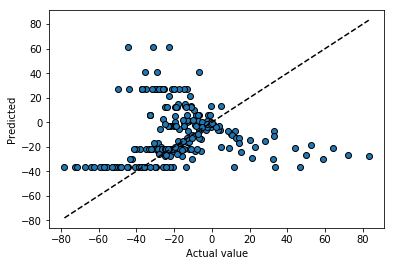

{'fit_time': array([0., 0., 0.]), 'score_time': array([0.00500321, 0.        , 0.        ]), 'test_score': array([ -3.20348464, -12.93482259,   0.07546128]), 'train_score': array([0.82193072, 0.85804611, 0.81764087])}


In [14]:
# E
#model.fit(dfData, E.tolist())
#print(model.score(dfData, E.tolist()))

predicted = cross_val_predict(model, dfData, E.tolist(), cv=3)
print(cross_val_score(model,  dfData, E.tolist(), cv=3))

accurayPlot(E, predicted)

cvResults = cross_validate(model, dfData, E.tolist(), cv=3)
print(cvResults)

0.8333535976506655
[-0.937697   -3.22723051 -0.30582759]


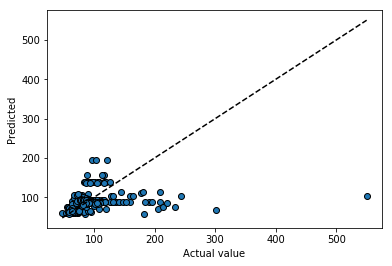

{'fit_time': array([0., 0., 0.]), 'score_time': array([0.01025224, 0.        , 0.        ]), 'test_score': array([-0.937697  , -3.22723051, -0.30582759]), 'train_score': array([0.80808104, 0.86446669, 0.82873846])}


In [15]:
# L
model.fit(dfData, L.tolist())
print(model.score(dfData, L.tolist()))

predicted = cross_val_predict(model, dfData, L.tolist(), cv=3)
print(cross_val_score(model,  dfData, L.tolist(), cv=3))

accurayPlot(L, predicted)

cvResults = cross_validate(model, dfData, L.tolist(), cv=3)
print(cvResults)

In [16]:
# 1.10.2. Regression - Decisiion Tree  Regresion 
# E
model = tree.DecisionTreeRegressor()

[ -4.99817577 -23.12522507  -0.66208541]


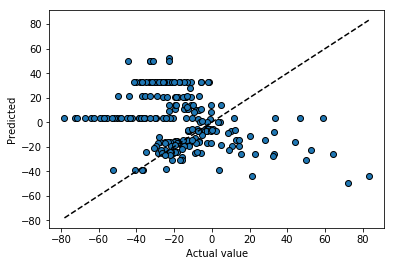

{'fit_time': array([0.        , 0.01001668, 0.        ]), 'score_time': array([0., 0., 0.]), 'test_score': array([ -4.95985054, -28.21207886,  -0.6565388 ]), 'train_score': array([1., 1., 1.])}


In [17]:
# E
#model.fit(dfData, E.tolist())
#print(model.score(dfData, E.tolist()))

predicted = cross_val_predict(model, dfData, E.tolist(), cv=3)
print(cross_val_score(model,  dfData, E.tolist(), cv=3))

accurayPlot(E, predicted)

cvResults = cross_validate(model, dfData, E.tolist(), cv=3)
print(cvResults)

1.0
[-2.33176333 -7.73207212 -0.3851093 ]


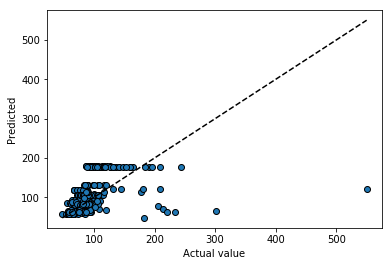

{'fit_time': array([0.00053692, 0.        , 0.        ]), 'score_time': array([0., 0., 0.]), 'test_score': array([-2.91761684, -3.67332446, -0.35644505]), 'train_score': array([1., 1., 1.])}


In [18]:
# L
model.fit(dfData, L.tolist())
print(model.score(dfData, L.tolist()))

predicted = cross_val_predict(model, dfData, L.tolist(), cv=3)
print(cross_val_score(model,  dfData, L.tolist(), cv=3))

accurayPlot(L, predicted)

cvResults = cross_validate(model, dfData, L.tolist(), cv=3)
print(cvResults)